# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>

<li>  *Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test*
    </ul>

In [1]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt

# Import data (only relevant columns)
df = pd.read_csv('data/human_body_temperature.csv', usecols=['temperature', 'gender'])

# Inspect the data
df.head()

,temperature,gender
0,99.3,F
1,98.4,F
2,97.8,M
3,99.2,F
4,98.0,F


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
temperature    130 non-null float64
gender         130 non-null object
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


The data seem to be imported correctly.  The variables have the right types, and there are no missing values. So let's answer the question about normality. We will start with a Q-Q Plot, which plots the quantiles of the observed distribution against the quantiles we would expect if the distribution was normal:

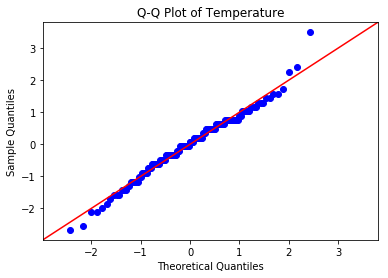

In [3]:
fig = sm.qqplot(df.temperature, stats.norm, fit=True, line='45')
plt.title('Q-Q Plot of Temperature')
plt.show()

The plot shows that the observed distribution of temperature has slightly wider tales (more extreme values) then a normal distribution. The data points do not all lie on the 45° line: For the most extreme values, the observed quantiles are more extreme than the theoretical quantiles. 

However, we cannot expect the observed and the theoretical quantile's to overlap perfectly in finite samples. Thus, we have to do a significance test to determine if this deviation could easily have been produced by random variation alone, or if it is substantial enough that we should reject the hypothesis that body temperature is normally distributed. One of the best tests for normality is the Shapiro-Wilk Test, so let's apply it:

In [4]:
# Conduct Shapiro-Wilk test, return only p-value
stats.shapiro(df.temperature)[1]

0.2331680953502655

The test yields a p-value of 0.23. Therefore, we cannot reject the null hypothesis that body temperature is normally distributed. 

<li>  *Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.*
    </ul>

First let's look at the sample size:

In [5]:
df.shape[0]

130

We have 130 observations. Unfortunately, there is no exact minimum number of observations for  asymptotic properties to hold, since convergence to the normal distribution depends on many factors.  For our purposes, 130 is good enough, because none of our tests actually rely on the assumption of asymptotics (?). [Nevertheless, we should remember that having to rely on this assumption introduces additional uncertainty.]

Now let's check for independence. Since we are dealing with the cross-sectional observations, not a time-series, it is hard to imagine that the observations would not be independent. The only circumstance under which this assumption may be violated is a very specific form of measurement error that has memory (e.g., if the memory error at a point in time is the sum of measurement errors in the past).  Even though this is extremely unlikely, let's test for independence just in case.  We will start with a poplar hypothesis test for first-order autocorrelation, the Durbin-Watson Test:

In [16]:
sm.stats.stattools.durbin_watson(df.temperature - df.temperature.mean())

1.938714386500485

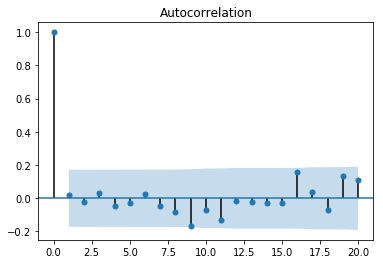

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.temperature, lags=20)
plt.show()
plt.close()

Now let's do the hacker way: We know that we can to make the observations independent by randomly reshuffling them. If we do this a large number of times, we can thus impute the distribution of the autocorrelation statistic under the null hypothesis of independent samples.  We can then compute the autocorrelation for the data as we have them, and determine where in this distribution it falls. This gives us the p-value.

<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****